In [1]:
import pandas as pd
import os 
import math

In [6]:
path = "/Volumes/LM_MG_drive_one/Morel_meta_analyses_transcriptomics/gene_overlap_analysis_01082020_TfhvsTn_TC_B6_noTC2DG/result_tab//"
list_files = os.listdir(path)

In [7]:
list_files

['.DS_Store',
 'result_TC_TfhvsTn.csv',
 'result_Tfh_vs_Tn_B6.csv',
 'result_Tfh_vs_Tn_TC2DG.csv']

In [8]:
csv_files = [x for x in list_files if ".csv" in x and ".ipynb" and "merged" not in x and "2DG" not in x]

In [9]:
csv_files

['result_TC_TfhvsTn.csv', 'result_Tfh_vs_Tn_B6.csv']

In [10]:
labels = [x.split(".")[0].replace("result_","") for x in csv_files]
labels

['TC_TfhvsTn', 'Tfh_vs_Tn_B6']

In [12]:
df_l = []
i = 0
for item in csv_files:
    temp = pd.read_csv(path + item)
    temp.columns = ['Unnamed: 0'] + [labels[i] + "_" + x for x in temp.columns[1:]] 
    i+=1
    df_l.append(temp)

In [13]:
[x.columns[0:5] for x in df_l]

[Index(['Unnamed: 0', 'TC_TfhvsTn_baseMean', 'TC_TfhvsTn_log2FoldChange',
        'TC_TfhvsTn_lfcSE', 'TC_TfhvsTn_stat'],
       dtype='object'),
 Index(['Unnamed: 0', 'Tfh_vs_Tn_B6_baseMean', 'Tfh_vs_Tn_B6_log2FoldChange',
        'Tfh_vs_Tn_B6_lfcSE', 'Tfh_vs_Tn_B6_stat'],
       dtype='object')]

In [14]:
m_df = pd.DataFrame()
for x in df_l:
    if m_df.shape[0] ==0:
        m_df = x
    else:
        m_df = pd.merge(m_df,x,on ='Unnamed: 0')

In [15]:
m_df.to_csv("merged_res_df_no2DG.csv",index=False)

In [17]:
from matplotlib_venn import venn2, venn2_circles
import matplotlib.pyplot as plt

#### 1st 2 gene list

log2FC > 0.584962501; padj < 0.05; 

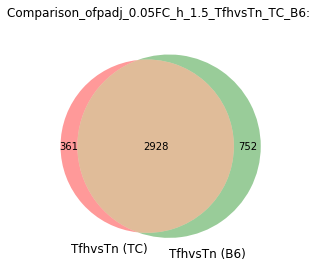

In [18]:
#parameter need to change
key= "TfhvsTn_TC_B6"
contrasts = ["TfhvsTn (TC)", "TfhvsTn (B6)"] #may look up the gene_dict.keys() later
padj_th = 0.05 # 0.05 or 0.1
FC_th = 1.5 #1 or 1.5 or 2

direction = 1
log2FC_th = math.log(FC_th,2)*direction;log2FC_th

gene_dict = {}
res_l = []
i=0
for x in df_l:
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2FoldChange" in z]
    gene_dict.update({"padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + 
                      labels[i]: x.loc[((x[padj_n[0]]<padj_th) & (x[FC_n[0]]>log2FC_th)),'Unnamed: 0'].tolist()}) #must be >
    i = i+1

gene_dict.keys()

[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_' + "padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + key + '.txt', 'w')
out.write(s)
out.close()

#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = contrasts)

plt.title('Comparison_of' + "padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + key +': \n')
plt.show()

f.savefig('Comparison_of' + "padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + key + '.pdf', bbox_inches='tight')

-------

#### log2FC < -0.584962501 (FC < 1.5); padj < 0.05; 

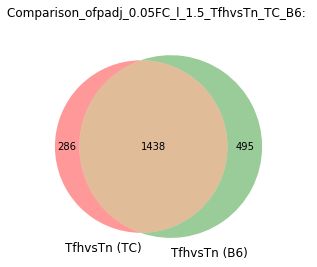

In [19]:
#parameter need to change
key= "TfhvsTn_TC_B6" #
contrasts = ["TfhvsTn (TC)", "TfhvsTn (B6)"] #may look up the gene_dict.keys() later
padj_th = 0.05 # 0.05 or 0.1
FC_th = 1.5 #1 or 1.5 or 2

direction = -1

log2FC_th = math.log(FC_th,2)*direction;log2FC_th

gene_dict = {}
res_l = []
i=0
for x in df_l:
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2FoldChange" in z]
    gene_dict.update({"padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + 
                      labels[i]: x.loc[((x[padj_n[0]]<padj_th) & (x[FC_n[0]]<log2FC_th)),'Unnamed: 0'].tolist()})
    i = i+1

gene_dict.keys()

[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_' + "padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + key + '.txt', 'w')
out.write(s)
out.close()

#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = contrasts)

plt.title('Comparison_of' + "padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + key +': \n')
plt.show()

f.savefig('Comparison_of' + "padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + key + '.pdf', bbox_inches='tight')

-------------